We will visualize the Reviews that people have put forward. And also based on their reviews we will be building a Prediction Model using different machine learning and deep learning models which signifies whether they are happy or disappointed with the product. 

## Import  libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from  PIL import Image
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam


D:\a\lib\site-packages\h5py\__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


# Load Data

In [2]:
df=pd.read_csv('GrammarandProductReviews.csv')
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


# Pre-processing 

In [3]:
df.shape

(71044, 25)

In [4]:
df.dtypes

id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating            int64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.userProvince     object
reviews.username         object
upc                      object
dtype: object

In [5]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [6]:
df = df.dropna(subset=['reviews.text'])

(-0.5, 674.5, 674.5, -0.5)

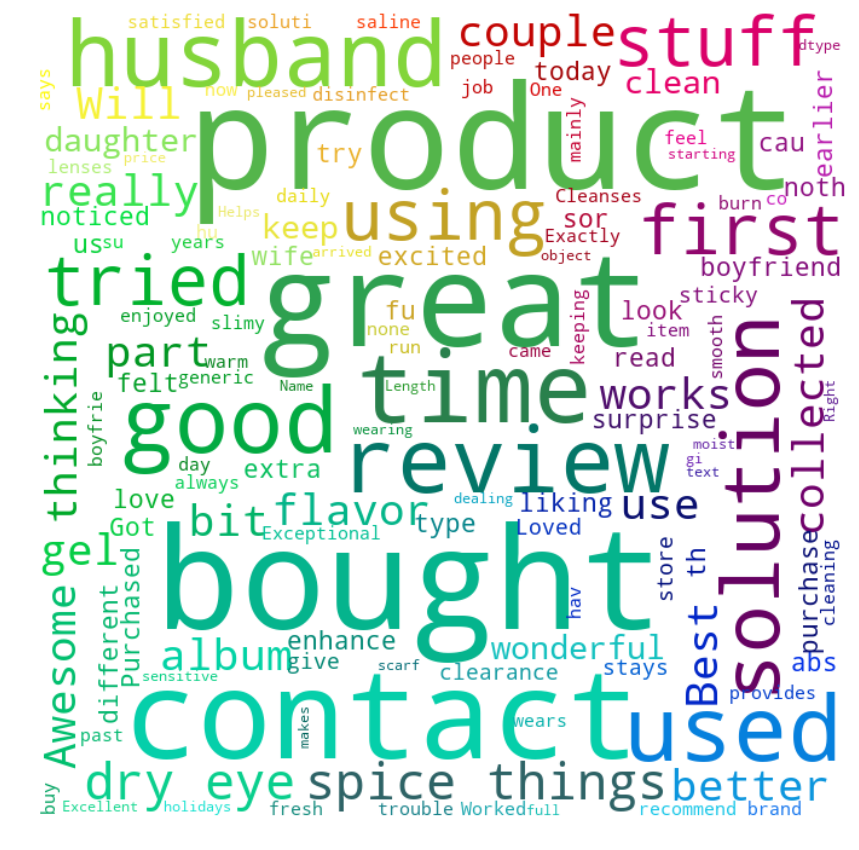

In [7]:
stopwords = set(STOPWORDS)
# Generate a word cloud image
mask = np.array(Image.open("C:/Users/aMaL/Desktop/Machine Learning Prooject/images.jpg"))
data=df['reviews.text']
wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=150,
        max_font_size=40, 
        scale=3,
        random_state=1,mask=mask).generate(str(data)) 

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

#### Select one specific product to predict the sentiment of the reviews: I choose Lundberg brand

In [8]:

df1 = df[df['brand']=='Lundberg']
cnt_srs = df1['reviews.rating'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Ratings distribution for Lundberg Brand ',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratings")

In [13]:
df1['reviews_length']=df1['reviews.text'].apply(len)

D:\a\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



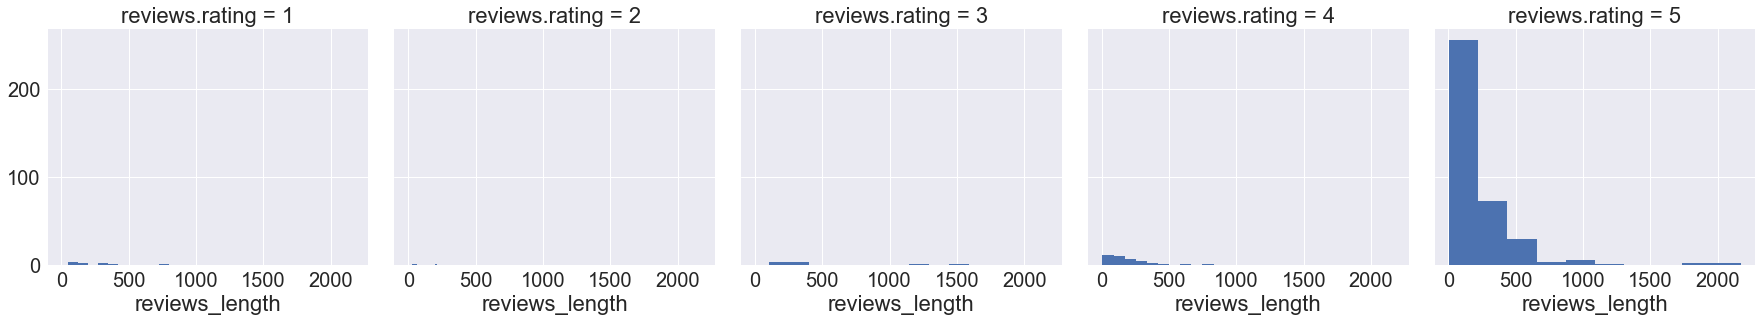

In [14]:
sns.set(font_scale=2.0)

g = sns.FacetGrid(df1,col='reviews.rating',size=5)
g.map(plt.hist,'reviews_length')

 So we notice that the longer the comments are, better the rating are.

#### Let's visualize the reviews.didPurchase in term of number of reviews 

Fake reviews (False) : number of  peoples who gave their review  despite not buying the product

In [15]:
df['reviews.didPurchase'].fillna("Review N/A",inplace=True)

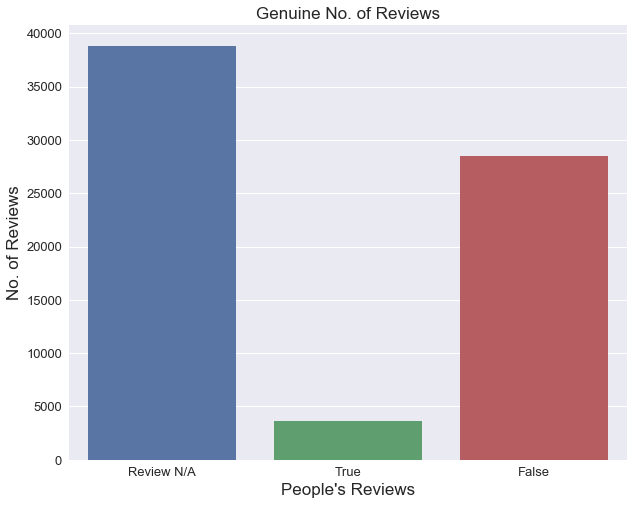

In [16]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['reviews.didPurchase'])
ax.set_xlabel(xlabel="People's Reviews",fontsize=17)
ax.set_ylabel(ylabel='No. of Reviews',fontsize=17)
ax.axes.set_title('Genuine No. of Reviews',fontsize=17)
ax.tick_params(labelsize=13)

### Now lets plot the correlation map¶


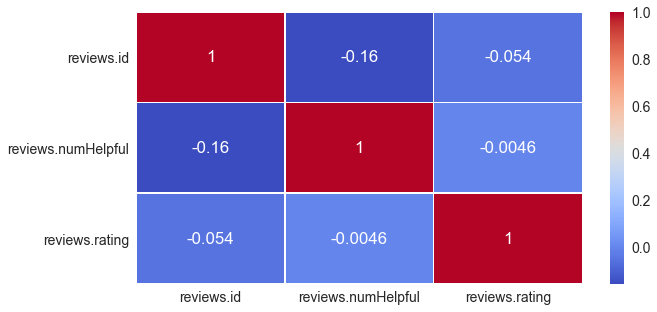

In [17]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [18]:
all_text=df['reviews.text']
train_text=df['reviews.text']
y=df['reviews.rating']

# Build Models 

 Vectorize the sequences of text sing the n-gram tfidf vectorizer


In [19]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)

In [20]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])

### Random Forest Classifier: Bagging techniques


In [24]:
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)

In [25]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)

In [29]:
rf_accuracy=accuracy_score(preds,y_test)

### XGBoost: Boosting techniques

The XGBoost library implements the gradient boosting decision tree algorithm.
Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

In [31]:
xgb=xgb.XGBClassifier()
xgb.fit(X_train,y_train)
preds2=xgb.predict(X_test)

D:\a\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [32]:
xgb_accuracy=accuracy_score(preds2,y_test)

In [33]:
print("Random Forest Model accuracy",rf_accuracy)

Random Forest Model accuracy 0.7083978782331127


In [34]:
print("XGBoost Model accuracy",xgb_accuracy)

XGBoost Model accuracy 0.6922029761066516


##### Difference between Random forest and XGBoost
Random forest is a bagging technique and not a boosting technique.
In boosting as the name suggests, one is learning from other which in turn boosts the learning. 
The trees in random forests are run in parallel. There is no interaction between these trees while building the trees.

### LSTM

 We will classify ratings<4 as sentiments, i.e. we will replace ratings less than 4 as not happy and vice-versa

So label 1= Happy label 2= Unhappy

In [35]:
#This way we get  2 boolean classes : True, False
df['sentiment'] = df['reviews.rating']<4

In [36]:
# Split the Data into train and test 
train_text, test_text, train_y, test_y = train_test_split(df['reviews.text'],df['sentiment'],test_size = 0.2)

In [38]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

D:\a\lib\site-packages\keras_preprocessing\text.py:174: UserWarning:

The `nb_words` argument in `Tokenizer` has been renamed `num_words`.



Found 26107 unique tokens.


In [39]:
MAX_SEQUENCE_LENGTH = 200
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (56806, 200)
Shape of data test tensor: (14202, 200)


In [40]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(1, activation='sigmoid')) # We used sigmoid function because we have binary classification

In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
model.fit(x_train, train_y,batch_size=128,epochs=10,validation_data=(x_test, test_y))

Train on 56806 samples, validate on 14202 samples
Epoch 1/10
56806/56806 [==============================] - 1081s 19ms/step - loss: 0.2730 - acc: 0.8963 - val_loss: 0.2226 - val_acc: 0.9180
Epoch 2/10
56806/56806 [==============================] - 1077s 19ms/step - loss: 0.1956 - acc: 0.9265 - val_loss: 0.2340 - val_acc: 0.9204
Epoch 3/10
56806/56806 [==============================] - 1084s 19ms/step - loss: 0.1645 - acc: 0.9400 - val_loss: 0.2186 - val_acc: 0.9191
Epoch 4/10
56806/56806 [==============================] - 1105s 19ms/step - loss: 0.1429 - acc: 0.9486 - val_loss: 0.2231 - val_acc: 0.9192
Epoch 5/10
56806/56806 [==============================] - 1078s 19ms/step - loss: 0.1244 - acc: 0.9567 - val_loss: 0.2450 - val_acc: 0.9183
Epoch 6/10
56806/56806 [==============================] - 1047s 18ms/step - loss: 0.1076 - acc: 0.9629 - val_loss: 0.2489 - val_acc: 0.9209
Epoch 7/10
56806/56806 [==============================] - 1069s 19ms/step - loss: 0.0954 - acc: 0.9675 - val_l

# Improvements

In the future, we plan on augmenting our data by generating new phrases having similar meaning or semantics 
from our existing dataset (using Thesaurus-based approaches) and tuning hyperparameters via tools like hyperopt.
Additionally, we can remove the data that have fake reviews